<a href="https://colab.research.google.com/github/masha713/numerical-methods/blob/master/%D0%BB%D0%B1_8%2C_%D0%94%D0%B5%D0%BC%D0%B5%D1%88%D0%BE%D0%BA_%D0%9C%D0%B0%D1%80%D1%96%D1%8F%2C_9_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. спосіб.

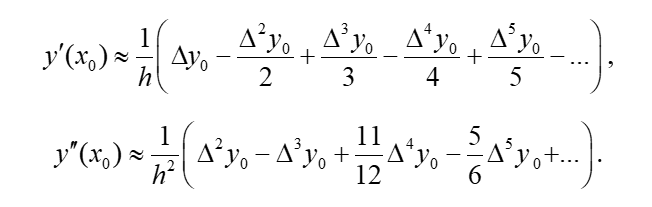

In [1]:
import numpy as np

# Таблиця значень функції
x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155])

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)

# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Значення кінцевих різниць для першої та другої похідних
#Змінити індекс відповідно рядка, який використовуєте (нумерація починається з нуля)
delta_y1 = delta_table[1, 1]  # Δy1
delta2_y1 = delta_table[1, 2]  # Δ²y1
delta3_y1 = delta_table[1, 3]  # Δ³y1
delta4_y1 = delta_table[1, 4]  # Δ⁴y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1  + 11*delta4_y1 / 12) / h**2

# Обчислюємо першу та другу похідні в точці x = 0.1
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

# Округляємо до точності 0.001
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виводимо результати
print(f"\nПерша похідна y'(0.1) ≈ {y1_prime}")
print(f"Друга похідна y''(0.1) ≈ {y1_double_prime}")


Таблиця кінцевих різниць:
[[ 3.526  0.256 -0.093  0.028 -0.    -0.001]
 [ 3.782  0.163 -0.065  0.028 -0.001  0.   ]
 [ 3.945  0.098 -0.037  0.027  0.     0.   ]
 [ 4.043  0.061 -0.01   0.     0.     0.   ]
 [ 4.104  0.051  0.     0.     0.     0.   ]
 [ 4.155  0.     0.     0.     0.     0.   ]]

Перша похідна y'(0.1) ≈ 1.025
Друга похідна y''(0.1) ≈ -2.348


In [2]:
delta_table

array([[ 3.526,  0.256, -0.093,  0.028, -0.   , -0.001],
       [ 3.782,  0.163, -0.065,  0.028, -0.001,  0.   ],
       [ 3.945,  0.098, -0.037,  0.027,  0.   ,  0.   ],
       [ 4.043,  0.061, -0.01 ,  0.   ,  0.   ,  0.   ],
       [ 4.104,  0.051,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 4.155,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

2. спосіб

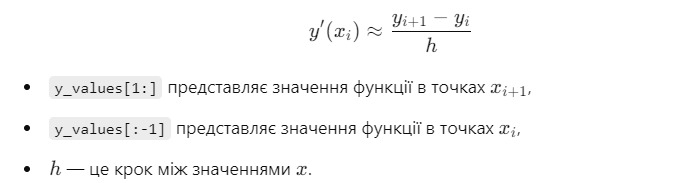

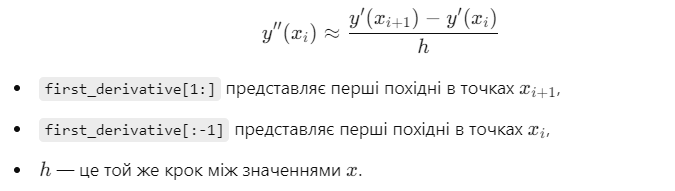

In [3]:
import numpy as np

# Таблиця значень функції
#x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4])
#y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155])

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
# Перша похідна
first_derivative = (y_values[1:] - y_values[:-1]) / h

# Друга похідна
second_derivative = (first_derivative[1:] - first_derivative[:-1]) / h

# Виведення результатів
print("Перша похідна:")
print("x = 0.1:", round(first_derivative[0],3))  # Перший елемент, який відповідає x = 0.1

print("Друга похідна:")
print("x = 0.1:", round(second_derivative[0], 3))  # Перший елемент, який відповідає x = 0.1

Перша похідна:
x = 0.1: 1.28
Друга похідна:
x = 0.1: -2.325


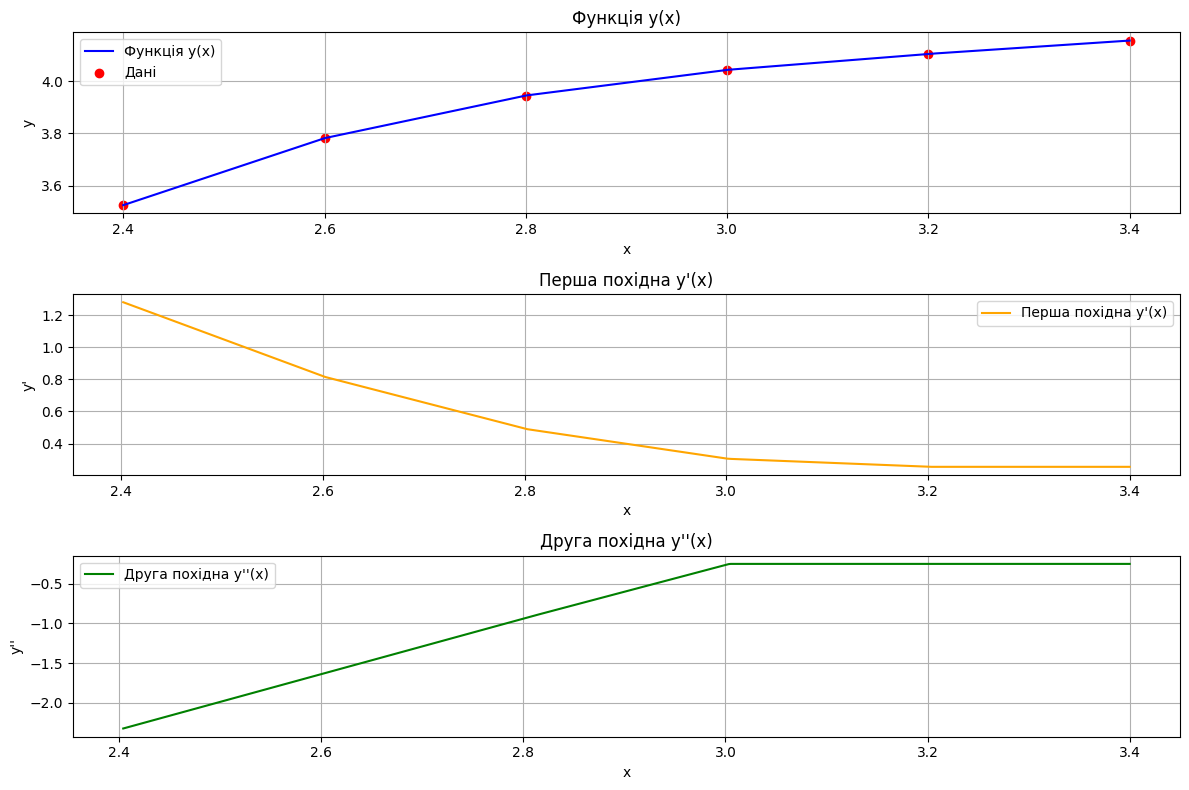

In [4]:
import matplotlib.pyplot as plt

# Інтерполяція значень для побудови графіків
x_fine = np.linspace(x_values[0], x_values[-1], 500)
y_fine = np.interp(x_fine, x_values, y_values)

# Обчислення першої та другої похідної для нових точок
first_deriv_fine = np.interp(x_fine[:-1], x_values[:-1], first_derivative)
second_deriv_fine = np.interp(x_fine[:-2], x_values[:-2], second_derivative)

# Створюємо графіки
plt.figure(figsize=(12, 8))

# Графік функції
plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label='Функція y(x)', color='blue')
plt.scatter(x_values, y_values, color='red', label='Дані')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Графік першої похідної
plt.subplot(3, 1, 2)
plt.plot(x_fine[1:], first_deriv_fine, label="Перша похідна y'(x)", color='orange')
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

# Графік другої похідної
plt.subplot(3, 1, 3)
plt.plot(x_fine[2:], second_deriv_fine, label="Друга похідна y''(x)", color='green')
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()